In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, make_scorer

import sklearn

### Class imbalance
from imblearn.over_sampling import RandomOverSampler

In [2]:
plt.style.use('seaborn-dark-palette')

<div style='padding: 5px; background-color: rgb(0, 128, 128); color: white'> Loading Data </div>

In [3]:
data = pd.read_csv('../data/bank-full.csv', sep=';')

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


###### Overall data summaries

In [5]:
data.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [6]:
data.shape

(45211, 17)

In [7]:
dtypeData = pd.DataFrame({'Variable': data.dtypes.index, 'DataType': data.dtypes})
dtypeData

,Variable,DataType
age,age,int64
job,job,object
marital,marital,object
education,education,object
default,default,object
balance,balance,int64
housing,housing,object
loan,loan,object
contact,contact,object
day,day,int64


In [8]:
numericFields = dtypeData[dtypeData['DataType'] == 'int64']['Variable']
categoricalFields = dtypeData[dtypeData['DataType'] == 'object']['Variable']

<div style='padding: 5px; background-color: rgb(0, 128, 128)'> Univariate Distribution Analysis - <b> Independent Variable </b></div>

###### Numerical Variables

********************age********************


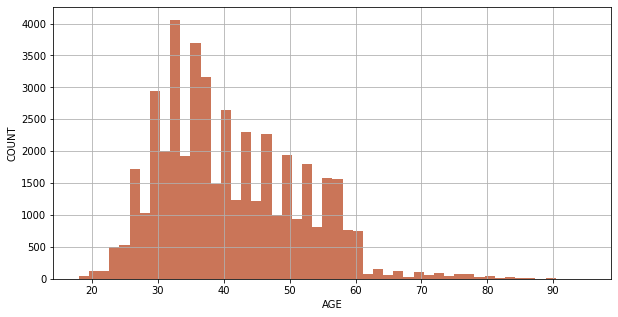

********************balance********************


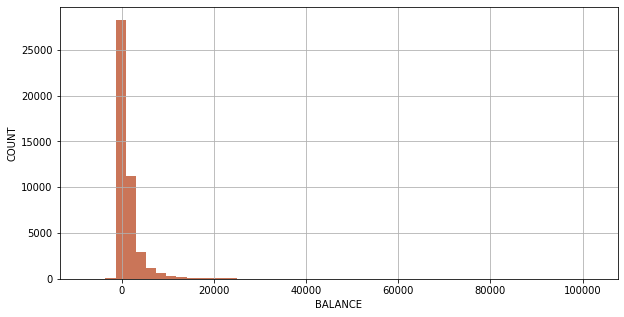

********************day********************


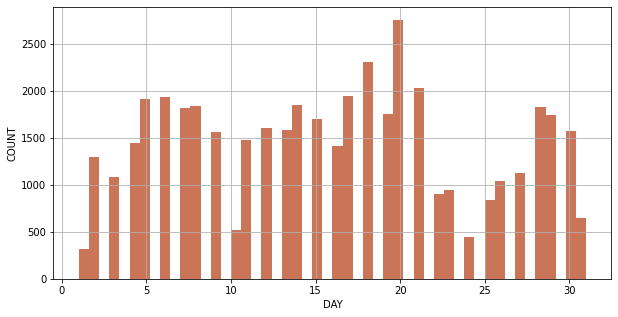

********************duration********************


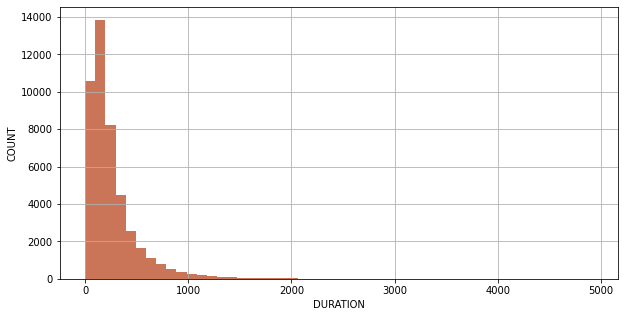

********************campaign********************


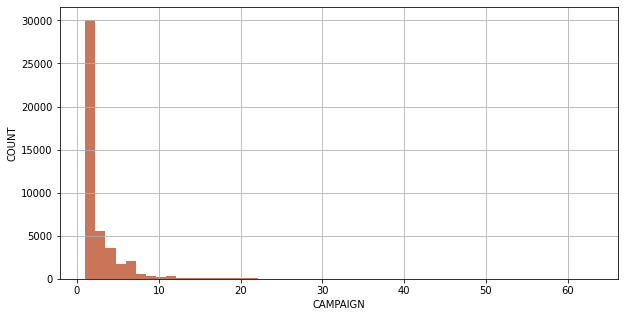

********************pdays********************


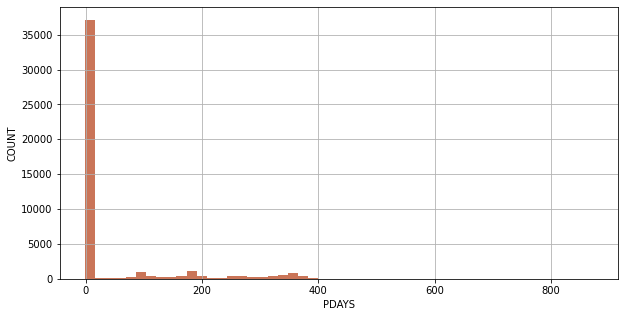

********************previous********************


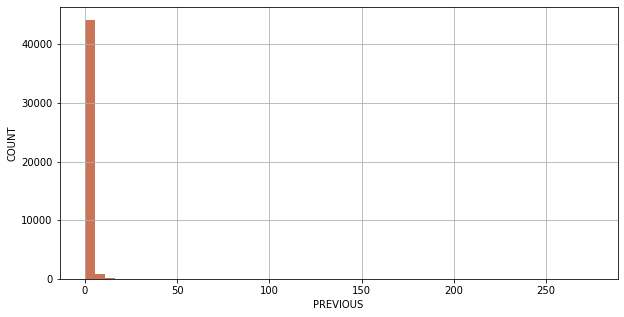

In [9]:
for i in numericFields:
    print("*"*20 + i + "*"*20)
    data[i].hist(bins=50, figsize=(10, 5), color ='#ca7558')
    plt.xlabel(i.upper())
    plt.ylabel('COUNT')
    plt.show()

###### Categorical Variables

********************job********************


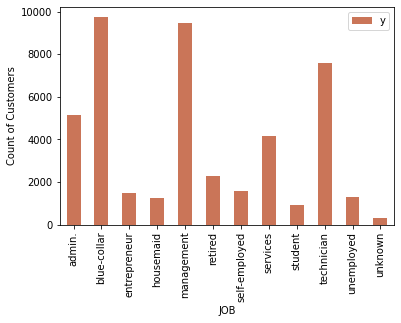

********************marital********************


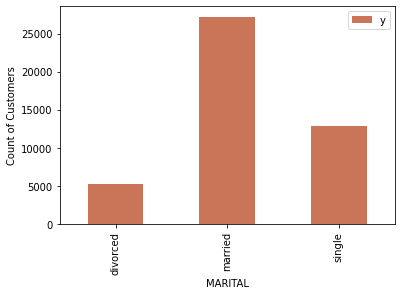

********************education********************


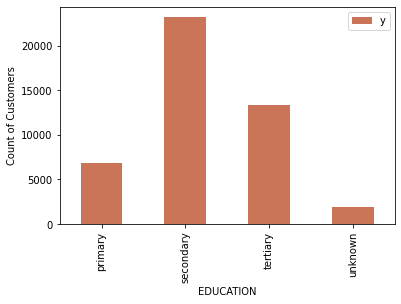

********************default********************


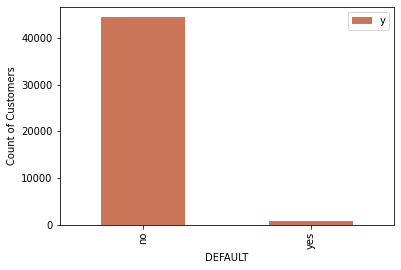

********************housing********************


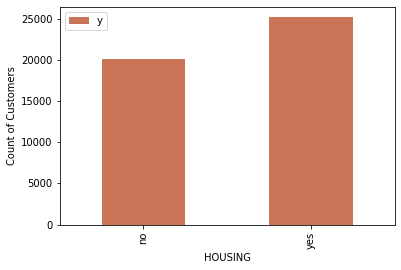

********************loan********************


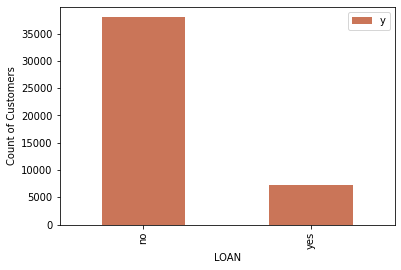

********************contact********************


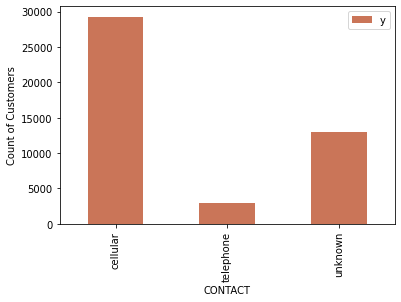

********************month********************


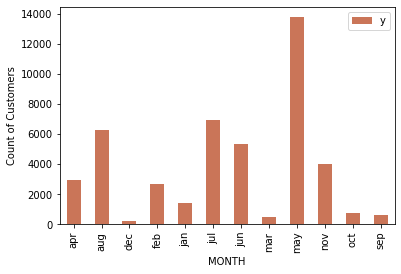

********************poutcome********************


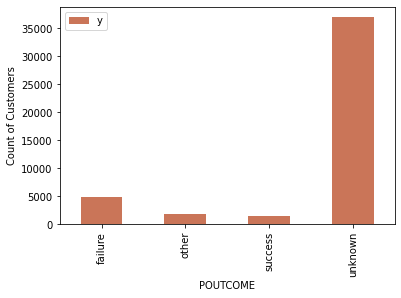

********************y********************


KeyError: 'y'

In [10]:
for i in categoricalFields:
    print("*"*20 + i + "*"*20)
    helperdf = data.groupby([i], as_index = False).count()
    helperdf.plot(x=i, y='y', kind = 'bar', color ='#ca7558')
    plt.xlabel(i.upper())
    plt.ylabel('Count of Customers')
    plt.show()

<div style='padding: 5px; background-color: rgb(0, 128, 128)'> Univariate Distribution Analysis - <b> Dependent Variable </b></div>

In [ ]:
helperdf = data.groupby(['y'], as_index = False).count()[['y', 'education']]
helperdf.columns = ['y', 'record_count']
helperdf['Prec'] = helperdf['record_count']/helperdf['record_count'].sum()
helperdf.plot(x='y', y='record_count', kind = 'bar', color ='#ca7558')
plt.show()

In [ ]:
helperdf

<div style='padding: 5px; background-color: rgb(0, 128, 128)'> Correlations vs VIF </div>

###### Correlation

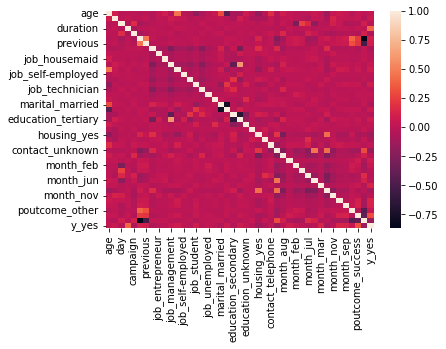

In [24]:
X = pd.get_dummies(data, drop_first=True)
sns.heatmap(X.corr())
X.corr().to_excel('../outputs/correlations_12022023.xlsx')

###### VIF

In [25]:
vifDf = pd.DataFrame()
X = data[list(set(data.columns)-set(['y']))]
X = pd.get_dummies(X, drop_first=True)
vifDf['Column'] = X.columns
vifDf['vif'] = [variance_inflation_factor(X, i) for i in range(0, len(X.columns))]

In [26]:
vifDf[vifDf['vif'] >= 3].sort_values(['vif'], ascending = False).to_csv('corr.csv')

<div style='padding: 5px; background-color: rgb(0, 128, 128)'> Bi-variate Analysis </div>

- Understanding the relationship of number (w.r.t averages) and non-numerical (w.r.t frequency) variables with target variable

###### Numerical Fields

********************age********************


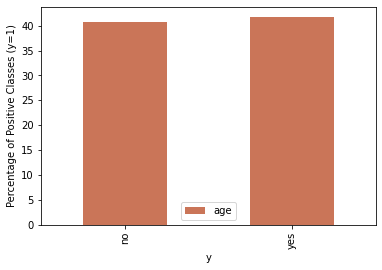

********************balance********************


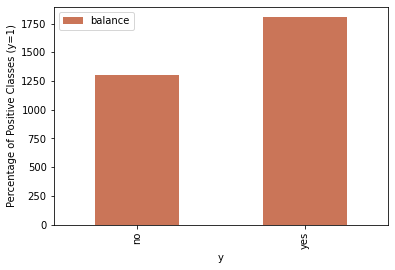

********************day********************


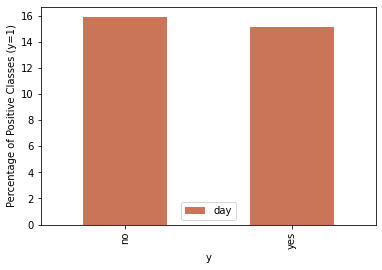

********************duration********************


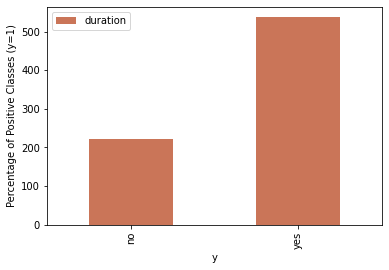

********************campaign********************


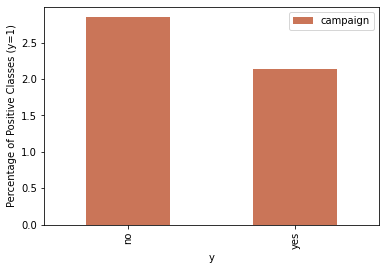

********************pdays********************


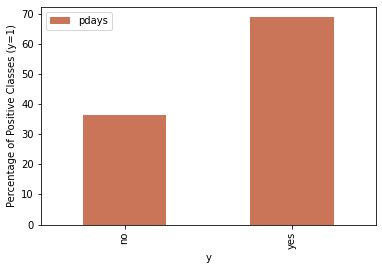

********************previous********************


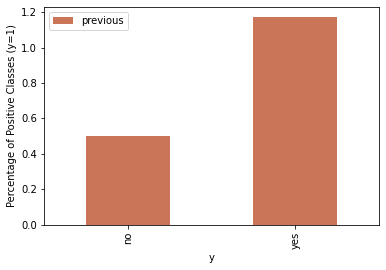

In [27]:
for i in numericFields:
    print('*'*20 + i + '*'*20)
    data.groupby(['y'], as_index=False).mean()[[i, 'y']].plot(x='y', y=i, kind = 'bar', color ='#ca7558')
    plt.xlabel('y')
    plt.ylabel('Percentage of Positive Classes (y=1)')
    plt.show()

###### Non-numerical Fields

********************job********************


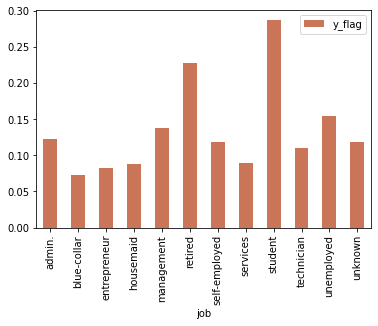

********************marital********************


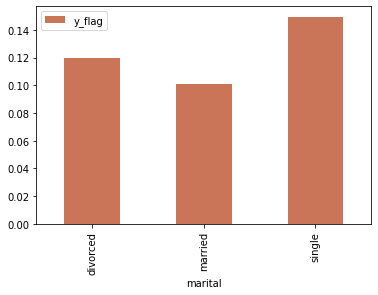

********************education********************


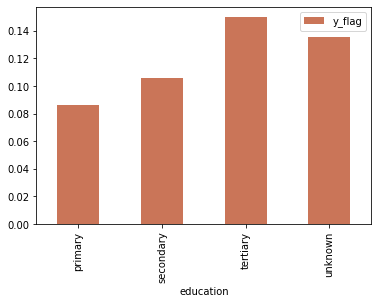

********************default********************


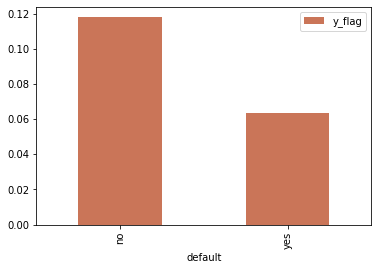

********************housing********************


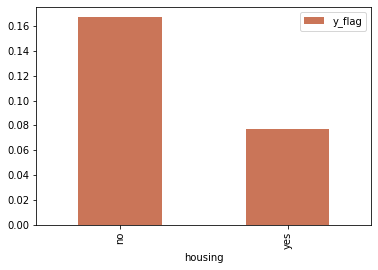

********************loan********************


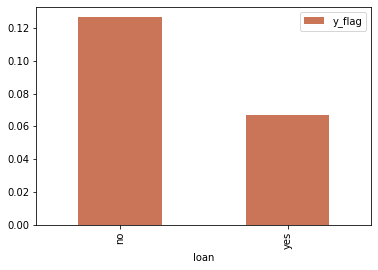

********************contact********************


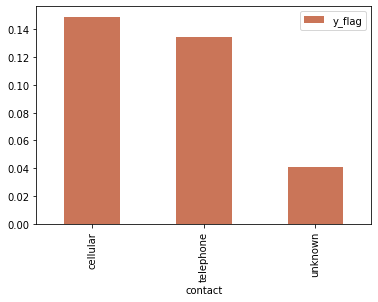

********************month********************


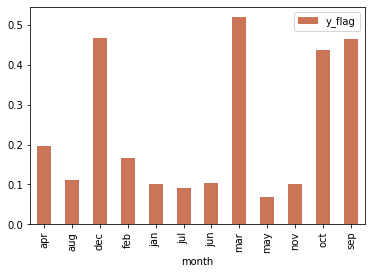

********************poutcome********************


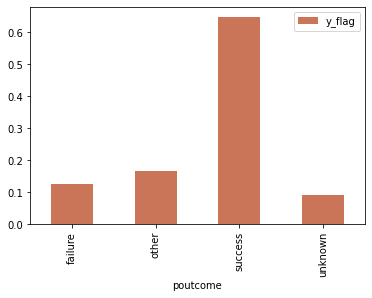

********************y********************


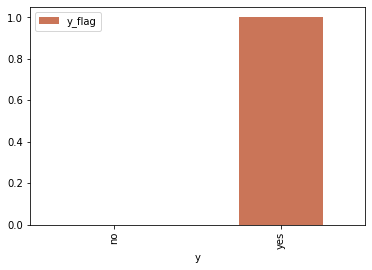

In [28]:
for i in categoricalFields:
    print('*'*20 + i + '*'*20)
    data['y_flag'] = [1 if i == 'yes' else 0 for i in data['y']]
    data.groupby([i], as_index=False).mean()[[i, 'y_flag']].plot(x=i, y='y_flag', kind = 'bar', color ='#ca7558')
    plt.show()

<div style='padding: 5px; background-color: rgb(0, 128, 128)'> Missing Values </div>

In [11]:
missingDf = pd.DataFrame({'Variable': data.isna().sum().index, 'Value': data.isna().sum(), 'Precentage': data.isna().sum()/data.shape[0]})
missingDf

,Variable,Value,Precentage
age,age,0,0.0
job,job,0,0.0
marital,marital,0,0.0
education,education,0,0.0
default,default,0,0.0
balance,balance,0,0.0
housing,housing,0,0.0
loan,loan,0,0.0
contact,contact,0,0.0
day,day,0,0.0


###### Target Variable class imbalance

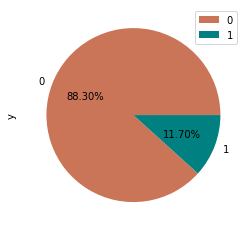

In [12]:
data.groupby(['y'], as_index = False).count()[['y', 'job']].plot(kind = 'pie', y = 'job', autopct = "%.2f%%", colors = ['#ca7558', '#008080'] )
plt.ylabel('y')
plt.show()

<div style='padding: 5px; background-color: rgb(0, 128, 128); color: white'> <h3> Data Preparation </h3> </div>

###### Outlier Treatment

In [13]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
data['age_updated'] = [i if i <= 60 else 60 for i in data['age']]
data['duration_updated'] = [i if i <= 2000 else 2000 for i in data['duration']]
data['balance_updated'] = [i if i <= 40000 else 40000 for i in data['balance']]
data['campaign_updated'] = [i if i <= 30 else 30 for i in data['campaign']]

In [15]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,age_updated,duration_updated,balance_updated,campaign_updated
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,58,261,2143,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,44,151,29,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,33,76,2,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,47,92,1506,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,33,198,1,1


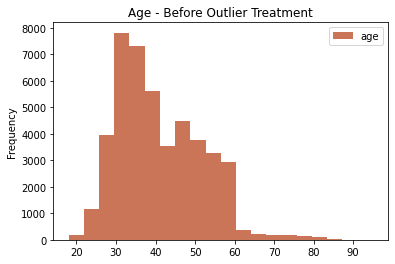

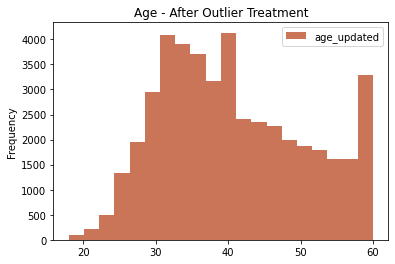

In [16]:
data[['age']].plot.hist(bins = 20, color ='#ca7558', title = 'Age - Before Outlier Treatment')
data[['age_updated']].plot.hist(bins = 20, color ='#ca7558', title = 'Age - After Outlier Treatment')
plt.show()

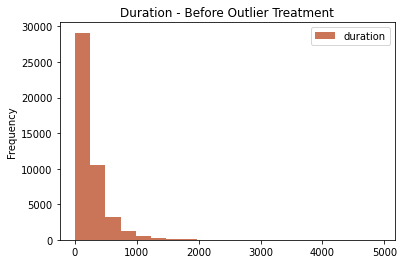

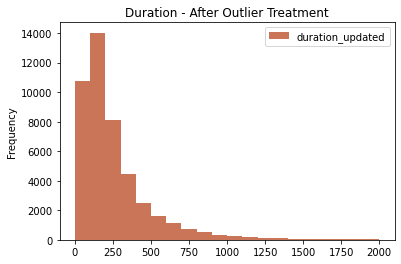

In [17]:
data[['duration']].plot.hist(bins = 20, color ='#ca7558', title = 'Duration - Before Outlier Treatment')
data[['duration_updated']].plot.hist(bins = 20, color ='#ca7558', title = 'Duration - After Outlier Treatment')
plt.show()

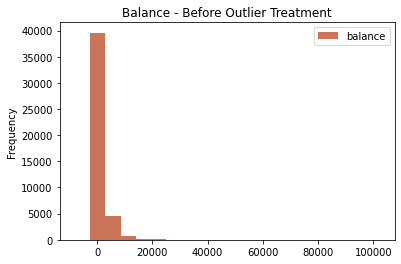

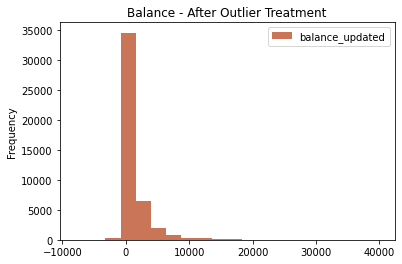

In [18]:
data[['balance']].plot.hist(bins = 20, color ='#ca7558', title = 'Balance - Before Outlier Treatment')
data[['balance_updated']].plot.hist(bins = 20, color ='#ca7558', title = 'Balance - After Outlier Treatment')
plt.show()

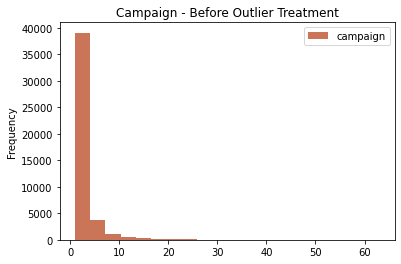

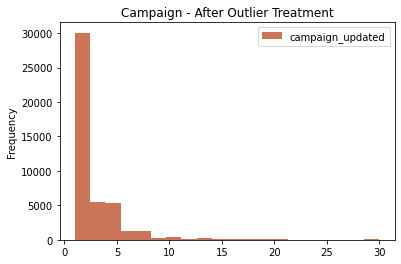

In [19]:
data[['campaign']].plot.hist(bins = 20, color ='#ca7558', title = 'Campaign - Before Outlier Treatment')
data[['campaign_updated']].plot.hist(bins = 20, color ='#ca7558', title = 'Campaign - After Outlier Treatment')
plt.show()

<div style='padding: 5px; background-color: rgb(0, 128, 128); color: white'> <h3> Feature Engineering </h3> </div>

###### Eliminating correlated variables

In [20]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_updated', 'duration_updated',
       'balance_updated', 'campaign_updated'],
      dtype='object')

In [21]:
data = data.drop(['pdays'], axis = 1)

###### Dummy coding categorical variables

In [22]:
data = pd.get_dummies(data)

<div style='padding: 5px; background-color: rgb(0, 128, 128); color: white'> <h3> Model Development - Decision Tree </h3> </div>

###### Test vs Train split

In [27]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data[['age_updated', 'duration_updated', 'balance_updated',
       'campaign_updated', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success']], data['y_yes'], test_size=0.2, random_state=2)

###### Class blancing for addressing class imbalancing using oversampling

In [29]:
overSampleData = RandomOverSampler(sampling_strategy=0.25)
XtrainOver, ytrainOver = overSampleData.fit_resample(Xtrain, ytrain)

###### Model Building

In [65]:
modelF1Score = make_scorer(f1_score)

In [68]:
gridParam = {'max_depth': list(range(1, 20, 1))}
grid = GridSearchCV(DecisionTreeClassifier(random_state = 2), gridParam, scoring = modelF1Score)
grid.fit(Xtrain, ytrain)


print('Train Evaluation')
print(classification_report(ytrain, grid.predict(Xtrain), target_names=['no', 'yes']))

print('*'*10)
print('Test Evaluation')
print(classification_report(ytest, grid.predict(Xtest), target_names=['no', 'yes']))

Train Evaluation
              precision    recall  f1-score   support

          no       0.94      0.97      0.95     31932
         yes       0.71      0.52      0.60      4236

    accuracy                           0.92     36168
   macro avg       0.82      0.74      0.78     36168
weighted avg       0.91      0.92      0.91     36168

**********
Test Evaluation
              precision    recall  f1-score   support

          no       0.93      0.96      0.94      7990
         yes       0.57      0.42      0.48      1053

    accuracy                           0.90      9043
   macro avg       0.75      0.69      0.71      9043
weighted avg       0.88      0.90      0.89      9043



In [71]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=9, random_state=2)

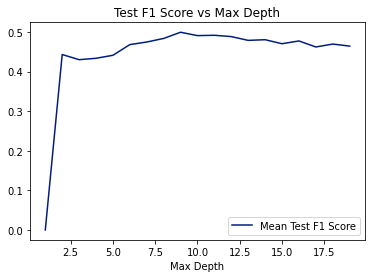

In [76]:
pd.DataFrame({'Mean Test F1 Score': grid.cv_results_['mean_test_score'], 'Max Depth': grid.cv_results_['param_max_depth']}).plot(x = 'Max Depth', y = 'Mean Test F1 Score', title = 'Test F1 Score vs Max Depth')
plt.show()

<div style='padding: 5px; background-color: rgb(0, 128, 128); color: white'> <h3> Model Development - Random Forest </h3> </div>

<div style='padding: 5px; background-color: rgb(0, 0, 0)'> Insights </div>

- No missing values observed in any of the column
- Data has a good mix of categorical and continous variables
- Dataset is slightly imbalanced with 11.7% of positive classes
- poutcome_unknown, month_may, day and marital_married are highly correlated with > 5 VIF
    - poutcome is highly correlated with pdays
    - Education secondary is correlated with education tertiary
    - Married_single is correlated with marital_married